## Задание

Распознайте рукописную цифру, написанную на листе от руки.
Последовательность шагов следующая:

*   На бумаге рисуем произвольную цифру (желательно нарисовать цифру размером не
более 5 * 5 мм и без наклона. В занятии нейронка обучалась на цифрах американских студентов. Эти цифры были написаны на тетрадных листах в клетку и имели схожий размер).
*   Фотографируем. Загружаем фото в Collaboratory.
*   С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
*   С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
*   Выполняем инверсию цветов, нормирование и решейп массива.
*   Выполняем распознавание собственной рукописной цифры.

Примечание: точность распознавания рукописных цифр может быть достаточно низкой, т.к. рукописные цифры после преобразований хоть и похожи на содержащиеся в базе, но могут отличаться по конфигурации, толщине линий и т.д.


In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [ ]:
# Ваше решение


(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

x_train = x_train_org.reshape(x_train_org.shape[0], -1)
x_test = x_test_org.reshape(x_test_org.shape[0], -1)

# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype("float32") / 255.0

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype("float32") / 255.0

CLASS_COUNT = 10


# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(800, input_dim=784, activation="relu"))

# Добавление полносвязного слоя на 400 нейронов с relu-активацией
model.add(Dense(400, activation="relu"))

# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation="softmax"))

# Компиляция модели
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(
    x_train,  # обучающая выборка, входные данные
    y_train,  # обучающая выборка, выходные данные
    batch_size=128,  # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
    epochs=15,  # количество эпох, когда нейронка обучается на всех примерах выборки
    verbose=1,
)  # 0 - не визуализировать ход обучения, 1 - визуализировать

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.8818 - loss: 0.3907
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9759 - loss: 0.0751
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9854 - loss: 0.0471
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9897 - loss: 0.0320
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9924 - loss: 0.0214
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9934 - loss: 0.0197
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9952 - loss: 0.0141
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9955 - loss: 0.0135
Epoch 9/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9954 - loss: 0.0138
Epoch 10/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9956 - loss: 0.0130
Epoch 11/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9959 - loss: 0.0125
Epoch 12/15
469/469 ━━━━━━━━━━

In [ ]:
model.save_weights("dz_ultra_pro.weights.h5")
model.load_weights("dz_ultra_pro.weights.h5")


In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

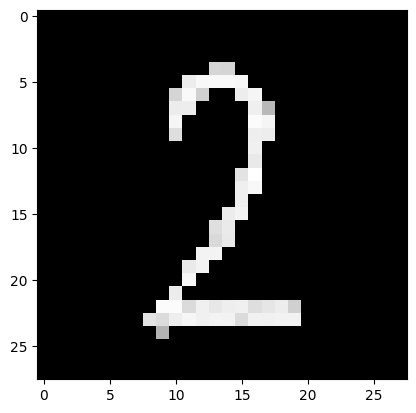

In [ ]:
img = image.load_img("image_2.png", target_size=(28, 28), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = 255 - img_array
img_array = np.where(img_array < 150, 0, img_array)
plt.imshow(img_array, cmap="gray")
img_train = img_array.reshape(1, -1).astype("float32")  / 255.0

In [ ]:
prediction = model.predict(img_train)
predicted_class = np.argmax(prediction)
print("Распознанная цифра:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Распознанная цифра: 2


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.8860 - loss: 0.3857 - val_accuracy: 0.9695 - val_loss: 0.0974
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9749 - loss: 0.0804 - val_accuracy: 0.9770 - val_loss: 0.0790
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9846 - loss: 0.0468 - val_accuracy: 0.9755 - val_loss: 0.0769
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9911 - loss: 0.0295 - val_accuracy: 0.9760 - val_loss: 0.0792
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9920 - loss: 0.0238 - val_accuracy: 0.9784 - val_loss: 0.0743
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9930 - loss: 0.0198 - val_accuracy: 0.9776 - val_loss: 0.0858
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9946 - loss: 0.0146 - val_accuracy: 0.9808 - val_loss: 0.0721
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9956 - loss: 0.0142 - 

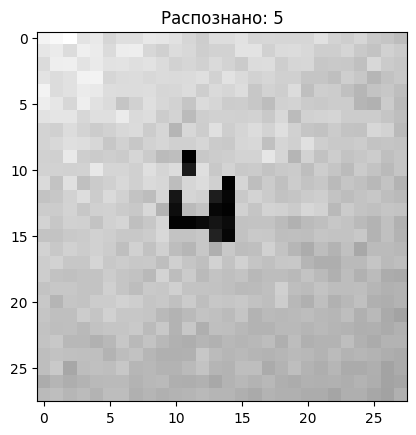

In [ ]:
from tensorflow.keras.preprocessing import image

# 1. Загрузка и подготовка данных MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Преобразование данных
x_train = x_train.reshape(x_train.shape[0], -1).astype("float32") / 255.0
x_test = x_test.reshape(x_test.shape[0], -1).astype("float32") / 255.0

# Преобразование меток в one-hot encoding
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# 2. Создание нейросети
model = Sequential()
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(400, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# 3. Обучение модели
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# 4. Загрузка и обработка собственного изображения
img_path = "number2.jpg"
img = image.load_img(img_path, target_size=(28, 28), color_mode="grayscale")

# Преобразование в массив numpy
img_array = image.img_to_array(img)

img_array = 255 - img_array

# Нормализация и изменение формы
img_array = img_array.astype("float32") / 255.0
img_array = img_array.reshape(1, -1)  # Превращаем в вектор 784 элементов

# 5. Распознавание цифры
prediction = model.predict(img_array)
predicted_digit = np.argmax(prediction)

print(f"Распознанная цифра: {predicted_digit}")

plt.imshow(img, cmap="gray")
plt.title(f"Распознано: {predicted_digit}")
plt.show()
